# Coding project - Watermark

By Alexandre Achten - 000494484

November 2023
## Get information about the images


Image dimensions:  (900, 1200, 3) Image type:  uint8
Watermark dimensions:  (85, 219, 3) Watermark type:  uint8


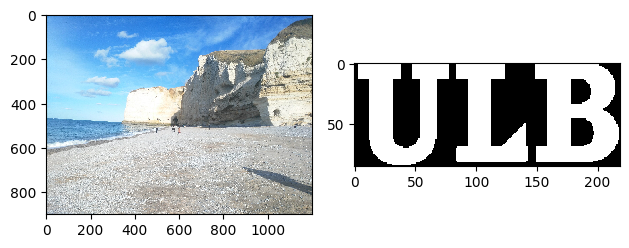

In [4]:
import numpy as np
from skimage.io import imread, imsave, imshow
import matplotlib.pyplot as plt
%matplotlib inline
WHITE = 255
BLACK = 0

# read image and watermark
img = imread("etretat.jpg")
wm = imread("watermark.png")

#show dimensions and type of image and watermark
print("Image dimensions: ", img.shape, "Image type: ", img.dtype)
print("Watermark dimensions: ", wm.shape, "Watermark type: ", wm.dtype)
#show images
plt.subplot(1,2,1)
imshow(img)
plt.subplot(1,2,2)
imshow(wm)
plt.show()


## Transform the images
Here we will keep only the white pixels of the watermark and transform the image in a grayscale image. Then we will add it to the image we want to watermark.

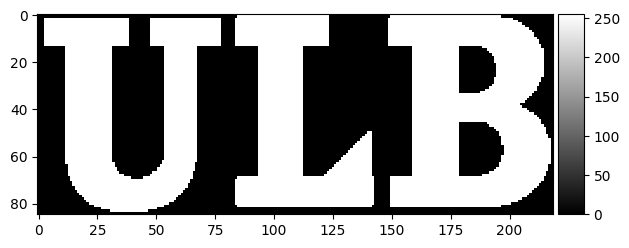

In [5]:
def get_logo(im):
    '''
    Transform in greyscale image
    '''
    im2 = np.zeros((im.shape[0], im.shape[1]))
    # get white pixels
    for y in range(im.shape[0]):
        for x in range(im.shape[1]):
            if im[y,x,0] == 255 and im[y,x,1] == 255 and im[y,x,2] == 255:
                im2[y,x] = 255
    return im2
    
logo = get_logo(wm)
imshow(logo,cmap='gray')

## Add the watermark
Now we can add the watermark to the image specifying the position of the watermark and the transparency level (between 0 and 255).

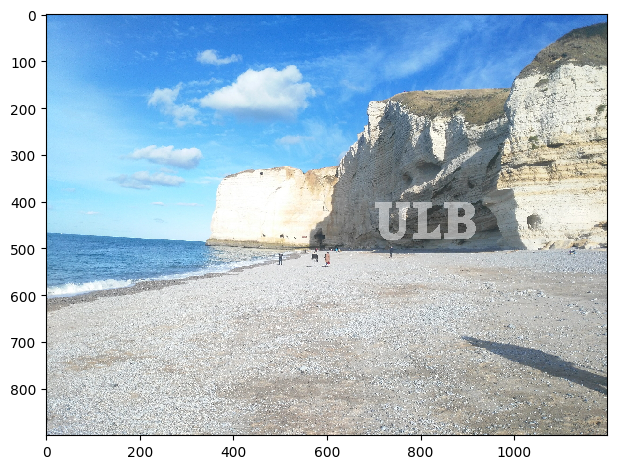

In [6]:
def check_luminosity(im,wm,pos):
    '''
    Check the mean luminosity of the area where the watermark will be added
    '''
    colors = [0,0,0]
    for y in range(wm.shape[0]):
        for x in range(wm.shape[1]):
            colors += im[pos[0]+y,pos[1]+x]
    mean_color = colors/(wm.shape[0]*wm.shape[1])
    if mean_color[0] > 200 and mean_color[1] > 200 and mean_color[2] > 200:
        return True
    else:
        return False
    
def add_wm(im,wm,pos,transparency=0.5):
    '''
    Add the watermark to the image
    '''
    im2=im.copy()
    luminosity = check_luminosity(im,wm,pos)
    for y in range(wm.shape[0]):
        for x in range(wm.shape[1]):
            if (wm[y,x]==WHITE).all():
                if luminosity:
                    wm[y,x]=BLACK
                im2[pos[0]+y,pos[1]+x]=im2[pos[0]+y,pos[1]+x]*(1-transparency)+wm[y,x]*transparency #mix two pixels
    return im2

logo = get_logo(wm)
position = [400,700]
final_img=add_wm(img,logo,position)
imshow(final_img)